In [1]:
import pandas as pd
from IPython.display import Image

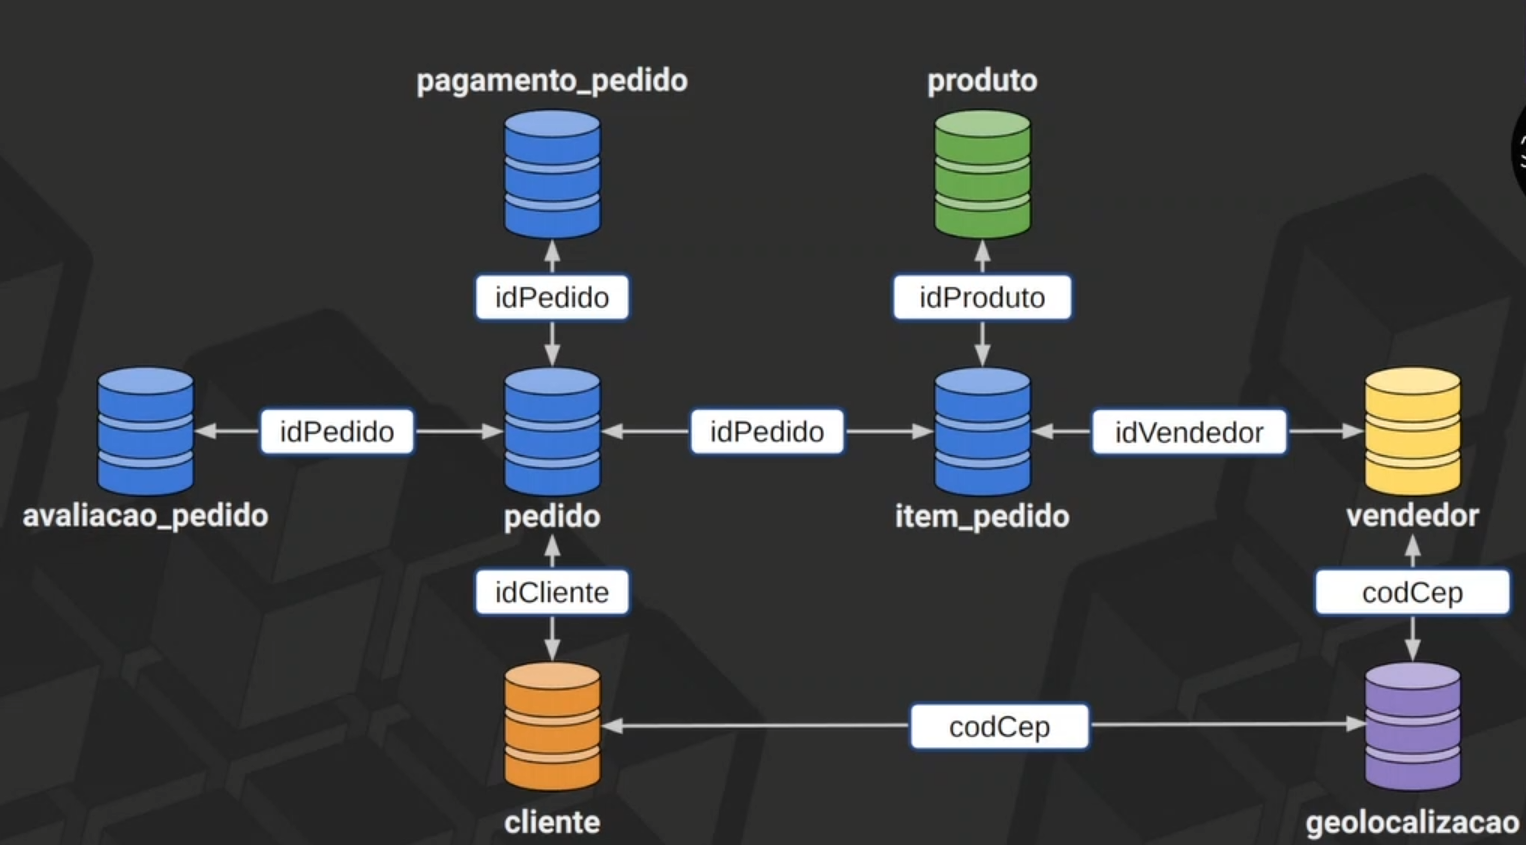

In [2]:
Image(filename='image/banco.png')

## Pagamento Pedido

In [3]:
pathOrderPayments = 'data/olist_order_payments_dataset.csv'
pathPagamentoPedido = 'etl/pagamento_pedido.csv'

In [4]:
pagamentos = pd.read_csv(pathOrderPayments)

In [5]:
pagamentos.head(15)

order_id  payment_sequential payment_type  \
0   b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1   a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2   25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3   ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4   42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
5   298fcdf1f73eb413e4d26d01b25bc1cd                   1  credit_card   
6   771ee386b001f06208a7419e4fc1bbd7                   1  credit_card   
7   3d7239c394a212faae122962df514ac7                   1  credit_card   
8   1f78449c87a54faf9e96e88ba1491fa9                   1  credit_card   
9   0573b5e23cbd798006520e1d5b4c6714                   1       boleto   
10  d88e0d5fa41661ce03cf6cf336527646                   1  credit_card   
11  2480f727e869fdeb397244a21b721b67                   1  credit_card   
12  616105c9352a9668c38303ad44e056cd                   1  credit_card   
13  cf95215a722f3ebf29e6bbab87a29e61                   1  credit_card   
14  769214176682788a92801d8907fa1b40                   1  credit_card   

    payment_installments  payment_value  
0                      8          99.33  
1                      1          24.39  
2                      1          65.71  
3                      8         107.78  
4                      2         128.45  
5                      2          96.12  
6                      1          81.16  
7                      3          51.84  
8                      6         341.09  
9                      1          51.95  
10                     8         188.73  
11                     1         141.90  
12                     1          75.78  
13                     5         102.66  
14                     4         105.28

In [6]:
pagamentos = pagamentos.rename(columns={'order_id': 'idPedido', 'payment_sequential': 'idPagamentoPedido', 
                                       'payment_type': 'descTipoPagamento', 'payment_installments': 'nrParcelas',
                                       'payment_value': 'vlPagamento'})

In [7]:
pagamentos.to_csv(pathPagamentoPedido, index = False, encoding = 'utf-8')

## Pedido

In [8]:
pathOrders = 'data/olist_orders_dataset.csv'
pathPedido = 'etl/pedido.csv'

In [9]:
pedido = pd.read_csv(pathOrders)

In [10]:
pedido.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [11]:
pedido = pedido.rename(columns={'order_id': 'idPedido', 'customer_id': 'idCliente', 'order_status': 'descSituacao',
                                'order_purchase_timestamp': 'dtPedido', 'order_approved_at': 'dtAprovado',
                                'order_delivered_carrier_date': 'dtEnvio', 'order_delivered_customer_date': 'dtEntrega',
                                'order_estimated_delivery_date': 'dtEntregaEstimada'})

In [12]:
pedido.to_csv(pathPedido, index = False, encoding = 'utf-8')

In [13]:
pedido['dtPedido'] = pd.to_datetime(pedido['dtPedido'])#.dt.date

In [14]:
pedido[['dtPedido', 'dtAprovado', 'dtEnvio', 'dtEntrega', 'dtEntregaEstimada']].head()

dtPedido           dtAprovado              dtEnvio  \
0 2017-10-02 10:56:33  2017-10-02 11:07:15  2017-10-04 19:55:00   
1 2018-07-24 20:41:37  2018-07-26 03:24:27  2018-07-26 14:31:00   
2 2018-08-08 08:38:49  2018-08-08 08:55:23  2018-08-08 13:50:00   
3 2017-11-18 19:28:06  2017-11-18 19:45:59  2017-11-22 13:39:59   
4 2018-02-13 21:18:39  2018-02-13 22:20:29  2018-02-14 19:46:34   

             dtEntrega    dtEntregaEstimada  
0  2017-10-10 21:25:13  2017-10-18 00:00:00  
1  2018-08-07 15:27:45  2018-08-13 00:00:00  
2  2018-08-17 18:06:29  2018-09-04 00:00:00  
3  2017-12-02 00:28:42  2017-12-15 00:00:00  
4  2018-02-16 18:17:02  2018-02-26 00:00:00

In [15]:
dtPedido = pedido.loc[(pedido['dtPedido'] >= '2017-07-01') & (pedido['dtPedido'] < '2018-01-01')]

In [16]:
dtPedido.head()

idPedido                         idCliente  \
0   e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3   949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
5   a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
9   e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   
11  34513ce0c4fab462a55830c0989c7edb  7711cf624183d843aafe81855097bc37   

   descSituacao            dtPedido           dtAprovado              dtEnvio  \
0     delivered 2017-10-02 10:56:33  2017-10-02 11:07:15  2017-10-04 19:55:00   
3     delivered 2017-11-18 19:28:06  2017-11-18 19:45:59  2017-11-22 13:39:59   
5     delivered 2017-07-09 21:57:05  2017-07-09 22:10:13  2017-07-11 14:58:04   
9     delivered 2017-07-29 11:55:02  2017-07-29 12:05:32  2017-08-10 19:45:24   
11    delivered 2017-07-13 19:58:11  2017-07-13 20:10:08  2017-07-14 18:43:29   

              dtEntrega    dtEntregaEstimada  
0   2017-10-10 21:25:13  2017-10-18 00:00:00  
3   2017-12-02 00:28:42  2017-12-15 00:00:00  
5   2017-07-26 10:57:55  2017-08-01 00:00:00  
9   2017-08-16 17:14:30  2017-08-23 00:00:00  
11  2017-07-19 14:04:48  2017-08-08 00:00:00

## Utilizar Pyplot

In [17]:
dfPagamentosPedido = pd.merge(dtPedido, pagamentos, left_on='idPedido', right_on='idPedido', how='left') 

In [18]:
dfPagamentosPedido.head()

idPedido                         idCliente  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   

  descSituacao            dtPedido           dtAprovado              dtEnvio  \
0    delivered 2017-10-02 10:56:33  2017-10-02 11:07:15  2017-10-04 19:55:00   
1    delivered 2017-10-02 10:56:33  2017-10-02 11:07:15  2017-10-04 19:55:00   
2    delivered 2017-10-02 10:56:33  2017-10-02 11:07:15  2017-10-04 19:55:00   
3    delivered 2017-11-18 19:28:06  2017-11-18 19:45:59  2017-11-22 13:39:59   
4    delivered 2017-07-09 21:57:05  2017-07-09 22:10:13  2017-07-11 14:58:04   

             dtEntrega    dtEntregaEstimada  idPagamentoPedido  \
0  2017-10-10 21:25:13  2017-10-18 00:00:00                  1   
1  2017-10-10 21:25:13  2017-10-18 00:00:00                  3   
2  2017-10-10 21:25:13  2017-10-18 00:00:00                  2   
3  2017-12-02 00:28:42  2017-12-15 00:00:00                  1   
4  2017-07-26 10:57:55  2017-08-01 00:00:00                  1   

  descTipoPagamento  nrParcelas  vlPagamento  
0       credit_card           1        18.12  
1           voucher           1         2.00  
2           voucher           1        18.59  
3       credit_card           1        72.20  
4       credit_card           6       175.26

In [19]:
#dfPagamentosPedido = dfPagamentosPedido.groupby('dtPedido')['dtPedido'].count()

In [20]:
#dtPedido = pedido.groupby('dtPedido')['dtPedido'].count()

## Item Pedido

In [21]:
pathOrderItems = 'data/olist_order_items_dataset.csv'
pathItemPedido = 'etl/itemPedido.csv'

In [22]:
itemPedido = pd.read_csv(pathOrderItems)

In [23]:
itemPedido.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [24]:
itemPedido = itemPedido.rename(columns={'order_id': 'idPedido', 'order_item_id': 'idPedidoItem', 'product_id': 'idProduto',
                                        'seller_id': 'idVendedor', 'shipping_limit_date': 'shipping_limit_date',
                                        'price': 'preco', 'freight_value': 'valor'})

In [25]:
itemPedido.head()

idPedido  idPedidoItem  \
0  00010242fe8c5a6d1ba2dd792cb16214             1   
1  00018f77f2f0320c557190d7a144bdd3             1   
2  000229ec398224ef6ca0657da4fc703e             1   
3  00024acbcdf0a6daa1e931b038114c75             1   
4  00042b26cf59d7ce69dfabb4e55b4fd9             1   

                          idProduto                        idVendedor  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   preco  valor  
0  2017-09-19 09:45:35   58.90  13.29  
1  2017-05-03 11:05:13  239.90  19.93  
2  2018-01-18 14:48:30  199.00  17.87  
3  2018-08-15 10:10:18   12.99  12.79  
4  2017-02-13 13:57:51  199.90  18.14

In [26]:
itemPedido.to_csv(pathItemPedido, index = False, encoding = 'utf-8')

## Estudo
usando sql no pandas

In [27]:
#!pip install -U pandasql

In [28]:
import pandasql as ps

In [29]:
ps.sqldf("select * from itemPedido")

idPedido  idPedidoItem  \
0       00010242fe8c5a6d1ba2dd792cb16214             1   
1       00018f77f2f0320c557190d7a144bdd3             1   
2       000229ec398224ef6ca0657da4fc703e             1   
3       00024acbcdf0a6daa1e931b038114c75             1   
4       00042b26cf59d7ce69dfabb4e55b4fd9             1   
...                                  ...           ...   
112645  fffc94f6ce00a00581880bf54a75a037             1   
112646  fffcd46ef2263f404302a634eb57f7eb             1   
112647  fffce4705a9662cd70adb13d4a31832d             1   
112648  fffe18544ffabc95dfada21779c9644f             1   
112649  fffe41c64501cc87c801fd61db3f6244             1   

                               idProduto                        idVendedor  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   preco  valor  
0       2017-09-19 09:45:35   58.90  13.29  
1       2017-05-03 11:05:13  239.90  19.93  
2       2018-01-18 14:48:30  199.00  17.87  
3       2018-08-15 10:10:18   12.99  12.79  
4       2017-02-13 13:57:51  199.90  18.14  
...                     ...     ...    ...  
112645  2018-05-02 04:11:01  299.99  43.41  
112646  2018-07-20 04:31:48  350.00  36.53  
112647  2017-10-30 17:14:25   99.90  16.95  
112648  2017-08-21 00:04:32   55.99   8.72  
112649  2018-06-12 17:10:13   43.00  12.79  

[112650 rows x 7 columns]

In [30]:
# Tirando as duplicidades
dfPedidos = ps.sqldf("""select distinct
                     t1.idPedido, 
                     t2.idVendedor
            
                     from pedido AS t1
            
                     LEFT JOIN itemPedido As t2
                     ON t1.idPedido = t2.idPedido
            
                     WHERE t1.dtPedido < '2018-01-01'
                     and t1.dtPedido >= '2017-07-01'
                     and t2.idVendedor is not null
                     """)

In [31]:
dfPedidos.head()

idPedido                        idVendedor
0  e481f51cbdc54678b7cc49136f2d6af7  3504c0cb71d7fa48d967e0e4c94d59d9
1  949d5b44dbf5de918fe9c16f97b45f8a  66922902710d126a0e7d26b0e3805106
2  a4591c265e18cb1dcee52889e2d8acc3  8581055ce74af1daba164fdbd55a40de
3  e69bfb5eb88e0ed6a785585b27e16dbf  7c67e1448b00f6e969d365cea6b010ab
4  34513ce0c4fab462a55830c0989c7edb  87142160b41353c4e5fca2360caf6f92

In [32]:
dfPagamentoVendedor = ps.sqldf("""select 
                     t1.idVendedor, 
                     t2.*
            
                     from dfPedidos AS t1
            
                     LEFT JOIN pagamentos AS t2
                     on t1.idPedido = t2.idPedido
                     """)

In [33]:
dfPagamentoVendedor.head(100)

idVendedor                          idPedido  \
0   3504c0cb71d7fa48d967e0e4c94d59d9  e481f51cbdc54678b7cc49136f2d6af7   
1   3504c0cb71d7fa48d967e0e4c94d59d9  e481f51cbdc54678b7cc49136f2d6af7   
2   3504c0cb71d7fa48d967e0e4c94d59d9  e481f51cbdc54678b7cc49136f2d6af7   
3   66922902710d126a0e7d26b0e3805106  949d5b44dbf5de918fe9c16f97b45f8a   
4   8581055ce74af1daba164fdbd55a40de  a4591c265e18cb1dcee52889e2d8acc3   
..                               ...                               ...   
95  8b321bb669392f5163d04c59e235e066  31ef15cb5a3faa4df17e96b09cd8c1a1   
96  ce27a3cc3c8cc1ea79d11e561e9bebb6  09d3f9f1be63c067456cc619076685a1   
97  1acde099eb406aa220b1169b188b42da  e3a83a19707a6f27e4fde8d6b13d43f4   
98  4a3ca9315b744ce9f8e9374361493884  75f433fd5ff62807235cb08b520c3c49   
99  cc419e0650a3c5ba77189a1882b7556a  bca3dc20a3ec02261c5b17dc270e9e65   

    idPagamentoPedido descTipoPagamento  nrParcelas  vlPagamento  
0                   1       credit_card           1        18.12  
1                   2           voucher           1        18.59  
2                   3           voucher           1         2.00  
3                   1       credit_card           1        72.20  
4                   1       credit_card           6       175.26  
..                ...               ...         ...          ...  
95                  1       credit_card           1        34.00  
96                  1       credit_card           1        63.86  
97                  1            boleto           1       177.36  
98                  1       credit_card           3       165.57  
99                  1            boleto           1       101.34  

[100 rows x 6 columns]

In [34]:
vendedorQtdePagamento = ps.sqldf("""Select idVendedor,
                       descTipoPagamento,
                       count(distinct idPedido) AS qtdePedidoMeiopagamento,
                       sum(vlPagamento) AS vlPedidoMeiopagamento
                       from dfPagamentoVendedor
                       group by idVendedor, descTipoPagamento
                       """)

In [35]:
vendedorQtdePagamento.head(15)

idVendedor descTipoPagamento  \
0   0015a82c2db000af6aaaf3ae2ecb0532       credit_card   
1   001cca7ae9ae17fb1caed9dfb1094831            boleto   
2   001cca7ae9ae17fb1caed9dfb1094831       credit_card   
3   001cca7ae9ae17fb1caed9dfb1094831        debit_card   
4   001cca7ae9ae17fb1caed9dfb1094831           voucher   
5   002100f778ceb8431b7a1020ff7ab48f            boleto   
6   002100f778ceb8431b7a1020ff7ab48f       credit_card   
7   002100f778ceb8431b7a1020ff7ab48f           voucher   
8   003554e2dce176b5555353e4f3555ac8       credit_card   
9   004c9cd9d87a3c30c522c48c4fc07416            boleto   
10  004c9cd9d87a3c30c522c48c4fc07416       credit_card   
11  004c9cd9d87a3c30c522c48c4fc07416           voucher   
12  00ee68308b45bc5e2660cd833c3f81cc            boleto   
13  00ee68308b45bc5e2660cd833c3f81cc       credit_card   
14  00ee68308b45bc5e2660cd833c3f81cc           voucher   

    qtdePedidoMeiopagamento  vlPedidoMeiopagamento  
0                         3                2748.06  
1                        18                3196.57  
2                        77               12912.36  
3                         2                 264.16  
4                         1                 140.08  
5                        16                 611.49  
6                        21                 710.63  
7                         5                 139.68  
8                         1                 139.38  
9                        18                2405.23  
10                       63                8432.13  
11                        4                 445.03  
12                        4                 588.98  
13                       37                5032.40  
14                        1                  88.71

In [36]:
vendedorQtdePagamentoTipo = ps.sqldf("""Select idVendedor,

                                    sum(case when descTipoPagamento = 'boleto' then qtdePedidoMeiopagamento else 0 end) as qtde_boleto,
                                    sum(case when descTipoPagamento = 'credit_card' then qtdePedidoMeiopagamento else 0 end) as qtde_credit_card,
                                    sum(case when descTipoPagamento = 'debit_card' then qtdePedidoMeiopagamento else 0 end) as qtde_debit_card,
                                    sum(case when descTipoPagamento = 'voucher' then qtdePedidoMeiopagamento else 0 end) as qtde_voucher,
                                    
                                    sum(case when descTipoPagamento = 'boleto' then vlPedidoMeiopagamento else 0 end) as valor_boleto,
                                    sum(case when descTipoPagamento = 'credit_card' then vlPedidoMeiopagamento else 0 end) as valor_credit_card,
                                    sum(case when descTipoPagamento = 'debit_card' then vlPedidoMeiopagamento else 0 end) as valor_debit_card,
                                    sum(case when descTipoPagamento = 'voucher' then vlPedidoMeiopagamento else 0 end) as valor_voucher,
                                    
                                    sum(case when descTipoPagamento = 'boleto' then qtdePedidoMeiopagamento else 0 end) / sum(qtdePedidoMeiopagamento) as proporcao_qtde_boleto,
                                    sum(case when descTipoPagamento = 'credit_card' then qtdePedidoMeiopagamento else 0 end) / sum(qtdePedidoMeiopagamento) as proporcao_qtde_credit_card,
                                    sum(case when descTipoPagamento = 'debit_card' then qtdePedidoMeiopagamento else 0 end) / sum(qtdePedidoMeiopagamento) as proporcao_qtde_debit_card,
                                    sum(case when descTipoPagamento = 'voucher' then qtdePedidoMeiopagamento else 0 end) / sum(qtdePedidoMeiopagamento) as proporcao_qtde_voucher,
                                    
                                    sum(case when descTipoPagamento = 'boleto' then vlPedidoMeiopagamento else 0 end) / sum(vlPedidoMeiopagamento) as proporcao_valor_boleto,
                                    sum(case when descTipoPagamento = 'credit_card' then vlPedidoMeiopagamento else 0 end) / sum(vlPedidoMeiopagamento) as proporcao_valor_credit_card,
                                    sum(case when descTipoPagamento = 'debit_card' then vlPedidoMeiopagamento else 0 end) / sum(vlPedidoMeiopagamento) as proporcao_valor_debit_card,
                                    sum(case when descTipoPagamento = 'voucher' then vlPedidoMeiopagamento else 0 end) / sum(vlPedidoMeiopagamento) as proporcao_valor_voucher
                                    
                                    from vendedorQtdePagamento
                                    group by idVendedor
                                    """)
                                    

In [37]:
vendedorQtdePagamentoTipo

idVendedor  qtde_boleto  qtde_credit_card  \
0     0015a82c2db000af6aaaf3ae2ecb0532            0                 3   
1     001cca7ae9ae17fb1caed9dfb1094831           18                77   
2     002100f778ceb8431b7a1020ff7ab48f           16                21   
3     003554e2dce176b5555353e4f3555ac8            0                 1   
4     004c9cd9d87a3c30c522c48c4fc07416           18                63   
...                                ...          ...               ...   
1479  ff69aa92bb6b1bf9b8b7a51c2ed9cf8b            1                 3   
1480  ff82e8873fba613f2261a9acc896fd84            0                 1   
1481  ffdd9f82b9a447f6f8d4b91554cc7dd3            2                 4   
1482  ffeee66ac5d5a62fe688b9d26f83f534            2                 7   
1483  fffd5413c0700ac820c7069d66d98c89            3                15   

      qtde_debit_card  qtde_voucher  valor_boleto  valor_credit_card  \
0                   0             0          0.00            2748.06   
1                   2             1       3196.57           12912.36   
2                   0             5        611.49             710.63   
3                   0             0          0.00             139.38   
4                   0             4       2405.23            8432.13   
...               ...           ...           ...                ...   
1479                0             0       1028.62            3007.14   
1480                0             0          0.00              31.01   
1481                0             0        200.79            1116.29   
1482                0             0        328.52            1191.16   
1483                0             1        469.03            3684.23   

      valor_debit_card  valor_voucher  proporcao_qtde_boleto  \
0                 0.00           0.00                      0   
1               264.16         140.08                      0   
2                 0.00         139.68                      0   
3                 0.00           0.00                      0   
4                 0.00         445.03                      0   
...                ...            ...                    ...   
1479              0.00           0.00                      0   
1480              0.00           0.00                      0   
1481              0.00           0.00                      0   
1482              0.00           0.00                      0   
1483              0.00         381.00                      0   

      proporcao_qtde_credit_card  proporcao_qtde_debit_card  \
0                              1                          0   
1                              0                          0   
2                              0                          0   
3                              1                          0   
4                              0                          0   
...                          ...                        ...   
1479                           0                          0   
1480                           1                          0   
1481                           0                          0   
1482                           0                          0   
1483                           0                          0   

      proporcao_qtde_voucher  proporcao_valor_boleto  \
0                          0                0.000000   
1                          0                0.193577   
2                          0                0.418313   
3                          0                0.000000   
4                          0                0.213184   
...                      ...                     ...   
1479                       0                0.254876   
1480                       0                0.000000   
1481                       0                0.152451   
1482                       0                0.216177   
1483                       0                0.103441   

      proporcao_valor_credit_card  proporcao_valor_debit_card  \
0                     

In [38]:
pathVendedorQtdePagamentoTipo = 'etl/vendedorQtdePagamentoTipo.csv'

In [39]:
vendedorQtdePagamentoTipo.to_csv(pathVendedorQtdePagamentoTipo, index = False, encoding = 'utf-8')

In [40]:
dfTeste = ps.sqldf("""Select idVendedor,
                    AVG(nrParcelas) AS AvgParcelas,
                    PERCENTILE(nrParcelas, 0.5) AS medianaParcelas
                    from dfPagamentoVendedor
                    where descTipoPagamento = 'credit_card'
                    GROUP BY idVendedor
                    """)

PandaSQLException: (sqlite3.OperationalError) no such function: PERCENTILE
[SQL: Select idVendedor,
                    AVG(nrParcelas) AS AvgParcelas,
                    PERCENTILE(nrParcelas, 0.5) AS medianaParcelas
                    from dfPagamentoVendedor
                    where descTipoPagamento = 'credit_card'
                    GROUP BY idVendedor
                    ]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [73]:
dfTeste.head()

idVendedor  AvgParcelas
0  0015a82c2db000af6aaaf3ae2ecb0532     7.333333
1  001cca7ae9ae17fb1caed9dfb1094831     4.077922
2  002100f778ceb8431b7a1020ff7ab48f     1.809524
3  003554e2dce176b5555353e4f3555ac8     3.000000
4  004c9cd9d87a3c30c522c48c4fc07416     5.222222

In [58]:
dfPagamentoVendedor.head()

idVendedor                          idPedido  \
0  3504c0cb71d7fa48d967e0e4c94d59d9  e481f51cbdc54678b7cc49136f2d6af7   
1  3504c0cb71d7fa48d967e0e4c94d59d9  e481f51cbdc54678b7cc49136f2d6af7   
2  3504c0cb71d7fa48d967e0e4c94d59d9  e481f51cbdc54678b7cc49136f2d6af7   
3  66922902710d126a0e7d26b0e3805106  949d5b44dbf5de918fe9c16f97b45f8a   
4  8581055ce74af1daba164fdbd55a40de  a4591c265e18cb1dcee52889e2d8acc3   

   idPagamentoPedido descTipoPagamento  nrParcelas  vlPagamento  
0                  1       credit_card           1        18.12  
1                  2           voucher           1        18.59  
2                  3           voucher           1         2.00  
3                  1       credit_card           1        72.20  
4                  1       credit_card           6       175.26